In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score



In [2]:
#mount drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<h1>Loading image data and augmenting</h1>

In [3]:
train_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/train',
                                                     target_size=(256, 256),
                                                     batch_size=32,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(256, 256),
                                                     batch_size=32,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen.class_indices)
print(test_gen.class_indices)

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}


<h2>Custom CNN Model </h2>

In [6]:
model = Sequential()
#first conv layer
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', input_shape = (256, 256, 3)))
model.add(Activation('relu'))
#first maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#second conv layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
#second maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#third convolutional layer
model.add(Conv2D(filters = 64, kernel_size =(3, 3)))
model.add(Activation('relu'))
#third maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#fourth convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
model.add(Activation('relu'))
#fourth maxpool layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
#fifth convolutional
model.add(Conv2D(filters = 256, kernel_size = (3, 3)))
#fully connected component

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 activation_5 (Activation)   (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 activation_6 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [8]:
history = model.fit_generator(
    train_gen, epochs = 50, validation_data = test_gen
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
380/380 [==============================] - 6886s 18s/step - loss: 0.7512 - accuracy: 0.7035 - val_loss: 0.5264 - val_accuracy: 0.8207
Epoch 2/50
380/380 [==============================] - 265s 697ms/step - loss: 0.5258 - accuracy: 0.8167 - val_loss: 0.4572 - val_accuracy: 0.8552
Epoch 3/50
380/380 [==============================] - 265s 696ms/step - loss: 0.4044 - accuracy: 0.8689 - val_loss: 0.3047 - val_accuracy: 0.8897
Epoch 4/50
380/380 [==============================] - 264s 694ms/step - loss: 0.3486 - accuracy: 0.8845 - val_loss: 0.2806 - val_accuracy: 0.8837
Epoch 5/50
380/380 [==============================] - 263s 693ms/step - loss: 0.3304 - accuracy: 0.9032 - val_loss: 0.1641 - val_accuracy: 0.9387
Epoch 6/50
380/380 [==============================] - 263s 693ms/step - loss: 0.2471 - accuracy: 0.9227 - val_loss: 0.1381 - val_accuracy: 0.9523
Epoch 7/50
380/380 [==============================] - 264s 694ms/step - loss: 0.1932 - accuracy: 0.9430 - val_loss: 0.1056 - 

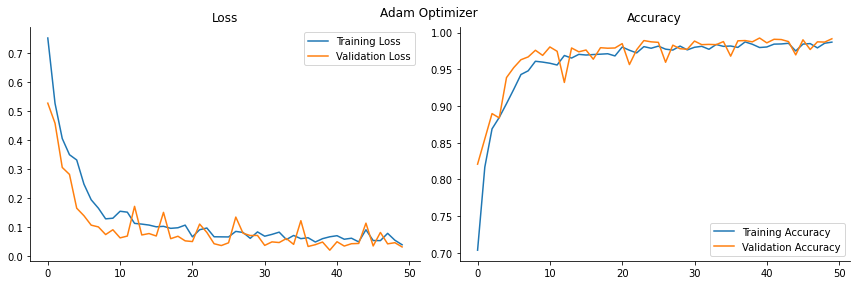

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("Adam Optimizer")

plt.tight_layout()

sns.despine()
plt.show()

In [19]:
model.save_weights('weights.h5')

<h2> Confusion Matrix</h2>

In [11]:
test_gen_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/phytomonk_classification_data/test',
                                                     target_size=(256, 256),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [12]:
y_pred = model.predict_generator(test_gen_new)
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


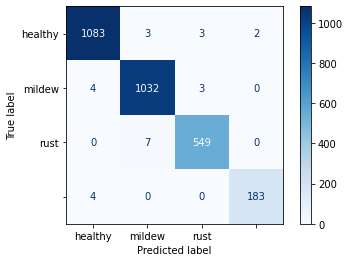

In [13]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
accuracy_score(test_gen_new.classes, y_pred)

0.9909502262443439

In [20]:
model.save('mymodel')

INFO:tensorflow:Assets written to: mymodel/assets


In [21]:
from tensorflow.keras.utils import plot_model

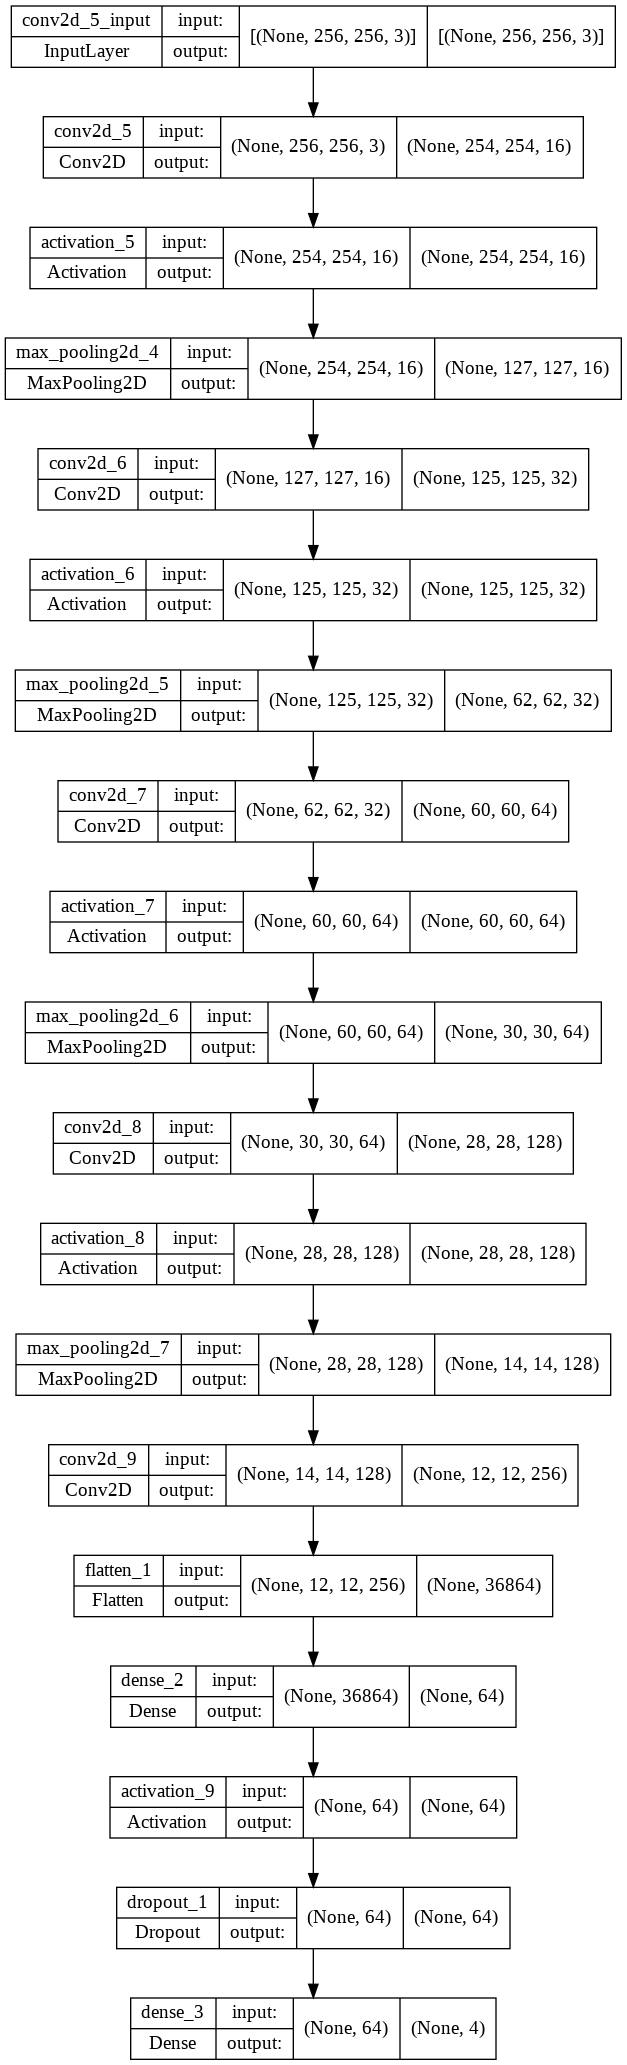

In [22]:
plot_model(model, to_file="mymodel.png", show_shapes=True)

In [24]:
!zip -r mymodel.zip mymodel

  adding: mymodel/ (stored 0%)
  adding: mymodel/assets/ (stored 0%)
  adding: mymodel/saved_model.pb (deflated 90%)
  adding: mymodel/keras_metadata.pb (deflated 93%)
  adding: mymodel/variables/ (stored 0%)
  adding: mymodel/variables/variables.index (deflated 68%)
  adding: mymodel/variables/variables.data-00000-of-00001 (deflated 9%)
